# Homework 3

In [ ]:
# Chebyshev Ivan

In [ ]:
# For some weird reason I got AttributeError caused by plot() in matplotlib, so I had to install it again, I guess
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# This is my setup cell, beware of stray arrays and radioactive activity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
import sklearn as sk
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing datasets
df = pd.read_csv('temp_data.csv')
print('Lock and load')

Lock and load


<img style="float: left; height: 5.5em;" alt = "Book" src="https://m.media-amazon.com/images/I/51c1VrgvhVL.jpg">
Here, you are invited to resolve 10 Data Analysis Tasks (each of 3 points).<br>
Please, find out helpful material, placed in the book Vanderplas, J. T. (2016). Python Data Science Handbook : Essential Tools for Working with Data; and the <a href="https://github.com/jakevdp/PythonDataScienceHandbook" target="_blank" rel="noopener noreferrer">notebooks for each chapter</a>.

## Temperature Data Analysis
Use `temp_data.csv` with historical temperatures (in Celsius) for given city.

**Useful links**: [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html), [pandas Q&A](https://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb), [matplotlib documentation](https://matplotlib.org/users/index.html), [matplotlib examples](https://matplotlib.org/examples/), [seaborn documentation](https://seaborn.pydata.org/#).

---

**Task 1**. Find out average temperatures by combinations of years and seasons (Winter, Spring, Summer, Autumn).

**Task 2**. Reproduce the chart (pay attention on all details) that is given below.


<img alt = "chart" src="https://raw.githubusercontent.com/ternikov/hse/gh-pages/hw5/plot.png">

In [ ]:
# Checking the dataset I'm dealing with
print(df.info())
df.head(13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    672 non-null    float64
 1   month   672 non-null    float64
 2   temp    672 non-null    float64
dtypes: float64(3)
memory usage: 15.9 KB
None


,year,month,temp
0,1952.0,1.0,-1.400966
1,1952.0,2.0,-4.000000
2,1952.0,3.0,-10.106838
3,1952.0,4.0,4.226190
4,1952.0,5.0,7.037037
5,1952.0,6.0,13.611111
6,1952.0,7.0,16.230159
7,1952.0,8.0,14.157706
8,1952.0,9.0,8.461538
9,1952.0,10.0,2.162698


In [ ]:
# Task 1
tmp = df # Duplicating the initial DF in case I need it for Task 2
tmp.replace([12.0, 1.0, 2.0], 'winter', inplace=True)
tmp.replace([3.0, 4.0, 5.0], 'spring', inplace=True)
tmp.replace([6.0, 7.0, 8.0], 'summer', inplace=True)
tmp.replace([9.0, 10.0, 11.0], 'autumn', inplace=True)
df_seas = tmp.groupby(['year', 'month'])['temp'].mean()
print(df_seas) # Answer to Task 1 is here
print('')
print('')
df_t2 = df_seas.reset_index()
print(df_t2)

year    month 
1952.0  autumn     2.747761
        spring     0.385463
        summer    14.666325
        winter    -2.770692
1953.0  autumn     6.093719
                    ...    
2015.0  winter     0.171104
2016.0  autumn     5.468751
        spring     6.190960
        summer    16.228594
        winter    -3.820706
Name: temp, Length: 224, dtype: float64


       year   month       temp
0    1952.0  autumn   2.747761
1    1952.0  spring   0.385463
2    1952.0  summer  14.666325
3    1952.0  winter  -2.770692
4    1953.0  autumn   6.093719
..      ...     ...        ...
219  2015.0  winter   0.171104
220  2016.0  autumn   5.468751
221  2016.0  spring   6.190960
222  2016.0  summer  16.228594
223  2016.0  winter  -3.820706

[224 rows x 3 columns]


In [ ]:
# I tried multiple methods but couldn't hide that 'non-existent' part of the plot, so I had to use this blunt method, I know it's not elegant but I needed to recreate the result ASAP
# I promise that I'll think about the 'smart' way of solving this task during the winter holidays
opts = [1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0]
df_t2.loc[df_t2['year'] == 1963.0]

df_t2.loc[48.5] = [1965.0, 'autumn', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[49.5] = [1965.0, 'spring', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[50.5] = [1965.0, 'summer', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[51.5] = [1965.0, 'winter', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[52.5] = [1966.0, 'autumn', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[53.5] = [1966.0, 'spring', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[54.5] = [1966.0, 'summer', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[55.5] = [1966.0, 'winter', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[56.5] = [1967.0, 'autumn', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[57.5] = [1967.0, 'spring', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[58.5] = [1967.0, 'summer', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[59.5] = [1967.0, 'winter', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[60.5] = [1968.0, 'autumn', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[61.5] = [1968.0, 'spring', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[62.5] = [1968.0, 'summer', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[63.5] = [1968.0, 'winter', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[64.5] = [1969.0, 'autumn', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[65.5] = [1969.0, 'spring', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[66.5] = [1969.0, 'summer', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[67.5] = [1969.0, 'winter', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[68.5] = [1970.0, 'autumn', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[69.5] = [1970.0, 'spring', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[70.5] = [1970.0, 'summer', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[71.5] = [1970.0, 'winter', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[72.5] = [1971.0, 'autumn', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[73.5] = [1971.0, 'spring', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[74.5] = [1971.0, 'summer', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[75.5] = [1971.0, 'winter', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[76.5] = [1972.0, 'autumn', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[77.5] = [1972.0, 'spring', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[78.5] = [1972.0, 'summer', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[79.5] = [1972.0, 'winter', None]
df_t2 = df_t2.sort_index().reset_index(drop=True)
df_t2.loc[df_t2.year == 1970]

# dtf = df_t2[df_t2['year'].isin(opts)]
# STH WRONG WITH THE TEMP IN 60'S (64-72 both included)
# pd.concat([df_t2, dtf]).drop_duplicates(keep=False)

,year,month,temp
69,1970.0,autumn,NaN
70,1970.0,spring,NaN
71,1970.0,summer,NaN
72,1970.0,winter,NaN


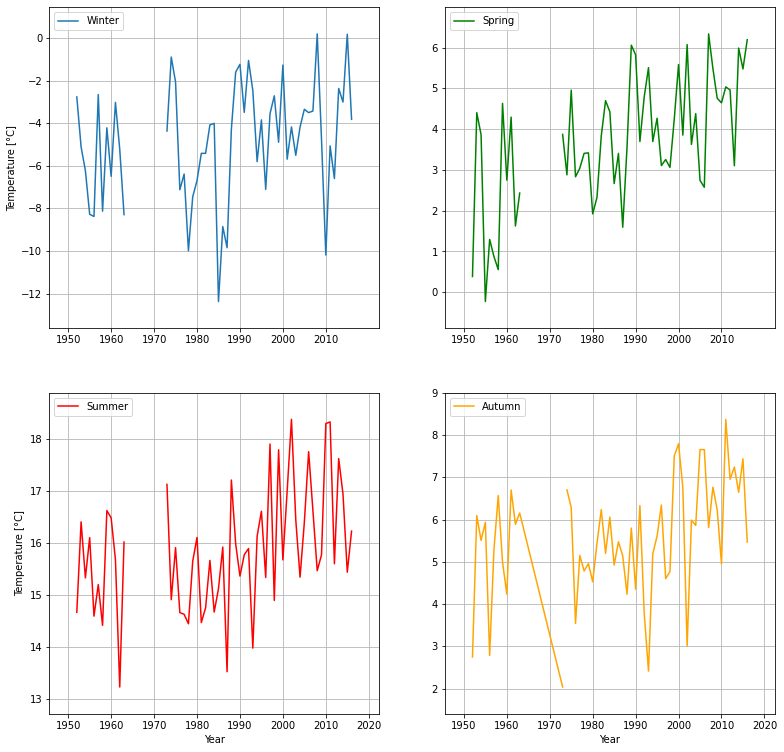

In [ ]:
from matplotlib.pyplot import figure
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=False)
axs[0, 0].plot(df_t2.loc[df_t2['month'] == 'winter', 'year'], df_t2.loc[df_t2['month'] == 'winter', 'temp'], label='Winter')
axs[0, 0].grid(color='0.7')
axs[0, 0].legend(loc='upper left')
axs[0, 0].set_xticks([1950, 1960, 1970, 1980, 1990, 2000, 2010])
axs[0, 0].set_ylabel('Temperature [°C]')

axs[0, 1].plot(df_t2.loc[df_t2['month'] == 'spring', 'year'], df_t2.loc[df_t2['month'] == 'spring', 'temp'], label='Spring', color='green')
axs[0, 1].grid(color='0.7')
axs[0, 1].legend(loc='upper left')
axs[0, 1].set_xlabel(' ')
axs[0, 1].set_xticks([1950, 1960, 1970, 1980, 1990, 2000, 2010])

axs[1, 0].plot(df_t2.loc[df_t2['month'] == 'summer', 'year'], df_t2.loc[df_t2['month'] == 'summer', 'temp'], label='Summer', color='red')
axs[1, 0].grid(color='0.7')
axs[1, 0].legend(loc='upper left')
axs[1, 0].set_ylabel('Temperature [°C]')
axs[1, 0].set_xlabel('Year')

axs[1, 1].plot(df_t2.loc[df_t2['month'] == 'autumn', 'year'], df_t2.loc[df_t2['month'] == 'autumn', 'temp'], label='Autumn', color='orange')
axs[1, 1].grid(color='0.7')
axs[1, 1].legend(loc='upper left')
axs[1, 1].set_xlabel('Year')

for ax in axs.flat:
    ax.margins(0.1)

# I hope this counts as Task 2 solution^^

# I tried to make the process autonomous but it didn't work TT
#for ax in axs.flat:
#    ax.set(xlabel='Year', ylabel='Temperature [°C]')

#for ax in axs.flat:
#    ax.label_outer()
# 4 subplots at once! https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
# mb sth useful here too https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/

## Linear Regression Analysis
Use `train.csv` dataset from [Sberbank Russian Housing Market](https://www.kaggle.com/c/sberbank-russian-housing-market/data) competition (you need to register on Kaggle in order to have an access to its datasets).

**Useful links**: [scikit-learn documentation](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning), [in depth: linear regression](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb).

---
**Task 3**. Using `train.csv` dataset (field's description in `data_dictionary.txt`), split it in two parts at random (use supporting code below) for `train_sample` (80% of observations) and `test_sample` (20% of observations). Perform two linear regression models for `price_doc` prediction for `train_sample` (use both numeric and categorical independent variables in your models).
```python
import pandas as pd
import zipfile

zf = zipfile.ZipFile('train.csv.zip') 
df = pd.read_csv(zf.open('train.csv'))

from sklearn.model_selection import train_test_split
train_sample, test_sample = train_test_split(df, test_size=0.2)
```

**Task 4**. Justify your choice and models' quality with supporting tests, charts and comments briefly.

**Task 5**. Assess the quality of your models on `test_sample` dataset. Use RMSE metric. Briefly describe whether or not this quality is appropriate.

In [ ]:
tr = pd.read_csv('train.csv')

In [ ]:
print(tr.head(5))
print('')
print(tr.life_sq.isnull().loc[tr.life_sq.isnull() == True])
print('')
tr.price_doc

   id   timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
0   1  2011-08-20       43     27.0    4.0        NaN       NaN         NaN   
1   2  2011-08-23       34     19.0    3.0        NaN       NaN         NaN   
2   3  2011-08-27       43     29.0    2.0        NaN       NaN         NaN   
3   4  2011-09-01       89     50.0    9.0        NaN       NaN         NaN   
4   5  2011-09-05       77     77.0    4.0        NaN       NaN         NaN   

   num_room  kitch_sq  ...  cafe_count_5000_price_2500  \
0       NaN       NaN  ...                         9.0   
1       NaN       NaN  ...                        15.0   
2       NaN       NaN  ...                        10.0   
3       NaN       NaN  ...                        11.0   
4       NaN       NaN  ...                       319.0   

  cafe_count_5000_price_4000 cafe_count_5000_price_high  \
0                        4.0                        0.0   
1                        3.0                        0.0   

0        5850000.0
1        6000000.0
2        5700000.0
3       13100000.0
4       16331452.0
           ...    
8201     5288828.0
8202     6300400.0
8203     5343000.0
8204     7900000.0
8205           NaN
Name: price_doc, Length: 8206, dtype: float64

In [ ]:
np.nan_to_num(tr.full_sq, nan=tr.full_sq.mean(), copy=False)
np.nan_to_num(tr.life_sq, nan=tr.life_sq.mean(), copy=False)
np.nan_to_num(tr.floor, nan=tr.floor.mean(), copy=False)

tr.full_sq.fillna(tr.full_sq.mean())
tr.life_sq.fillna(tr.life_sq.mean())
tr.floor.fillna(tr.floor.mean())

print(tr.full_sq.isnull().loc[tr.full_sq.isnull()])
print(tr.life_sq.isnull().loc[tr.life_sq.isnull()])
print(tr.floor.isnull().loc[tr.floor.isnull() == True])

Series([], Name: full_sq, dtype: bool)
Series([], Name: life_sq, dtype: bool)
Series([], Name: floor, dtype: bool)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

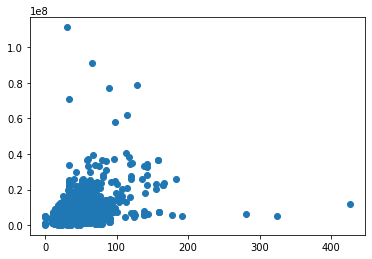

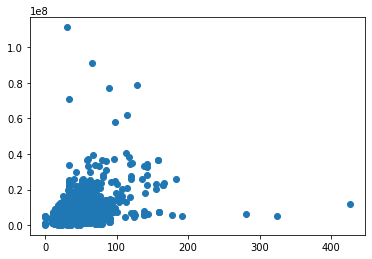

Model slope:     94712.87202137666
Model intercept: 3144505.1604055795


In [ ]:
# Simple Linear Regression
train_sample, test_sample = train_test_split(tr, test_size=0.2)

model = LinearRegression(fit_intercept=True)

rng = np.random.RandomState(1)
x = train_sample.life_sq.to_numpy()
y = train_sample.price_doc.to_numpy()
plt.scatter(x, y)
plt.show()
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

In [ ]:
# Models 1 and 2 (decision tree and random forest)
y = tr.price_doc
feats = ['full_sq', 'life_sq', 'floor']
X = tr[feats]
print(X)

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1, test_size=0.2)

model1 = DecisionTreeRegressor(random_state=1)
model1.fit(train_X, train_y)
val_predict1 = model1.predict(val_X)
val_mae1 = mean_absolute_error(val_predict1, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae1))
print(val_predict1[:5])
print(y.head())

model2 = RandomForestRegressor(random_state=1)

      full_sq   life_sq  floor
0          43  27.00000    4.0
1          34  19.00000    3.0
2          43  29.00000    2.0
3          89  50.00000    9.0
4          77  77.00000    4.0
...       ...       ...    ...
8201       63  33.66444   15.0
8202       82  33.66444    7.0
8203       68  33.66444    4.0
8204       60  33.00000    8.0
8205       75  33.66444    7.0

[8206 rows x 3 columns]


ValueError: ignored

## K-Nearest Neighbors Analysis
Use any financial ticker (except S&P500) to create the trading strategy, using KNN classifier.

**Hint**. Use [this material](https://blog.quantinsti.com/machine-learning-k-nearest-neighbors-knn-algorithm-python/) to start your own calculations. [This link](https://pypi.org/project/fix-yahoo-finance/0.1.30/) with library fixes might be helpful.

**Useful link**: [scikit-learn documentation](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).

---
**Task 6**. Upload data for one ticker (for the recent year) from Yahoo Finance. Make brief exploratory analysis of obtained data.

**Task 7**. Apply KNN classifier to obtained data. Assess the quality of the model. Create and briefly justify the trading strategy.

In [ ]:
!pip install yfinance

In [ ]:
# Setup for Tasks 6 and 7
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from pandas_datareader import data as pdr
import yfinance as yf

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [ ]:
# Task 6
# ydf = pdr.get_data_yahoo('NVDA', '2022-01-01', '2022-24-12')

# Just like with tasks 8 and 9 the line above just wouldn't work for any ticker from YF
# I tried searching StackOverflow and everyone proposed to update pd and pdr, so I did
# It never worked, so I had to download the data manually

ydf = pd.read_csv('NVDA.csv')
print(ydf.head(3))
ydf = ydf.dropna()
print(ydf.info())
print('Highest close price of the year: ', ydf.Close.max())
print('Lowest close price of the year: ', ydf.Close.min())
print('Total deals with NVDA stock, USD: ', ydf.Volume.sum())
print('Highest price per stock accepted: ', ydf.High.max())
print('Lowest price per stock accepted: ', ydf.Low.min())
print('Average open price of the year: ', ydf.Open.mean())
print('Average close price of the year: ', ydf.Close.mean())
print('Average price per stock in December, 2022: ', ydf.Close[:24].mean())
print('Greatest price difference within trading day: ', (ydf.Close - ydf.Open).max())

         Date        Open        High         Low       Close   Adj Close  \
0  2022-01-03  298.149994  307.109985  297.850006  301.209991  300.928589   
1  2022-01-04  302.769989  304.679993  283.489990  292.899994  292.626373   
2  2022-01-05  289.489990  294.160004  275.329987  276.040009  275.782104   

     Volume  
0  39154700  
1  52715400  
2  49806400  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       247 non-null    object 
 1   Open       247 non-null    float64
 2   High       247 non-null    float64
 3   Low        247 non-null    float64
 4   Close      247 non-null    float64
 5   Adj Close  247 non-null    float64
 6   Volume     247 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 15.4+ KB
None
Highest close price of the year:  301.209991
Lowest close price of the year:  112.269997
Total deals wi

Text(0, 0.5, 'Lowest price, USD')

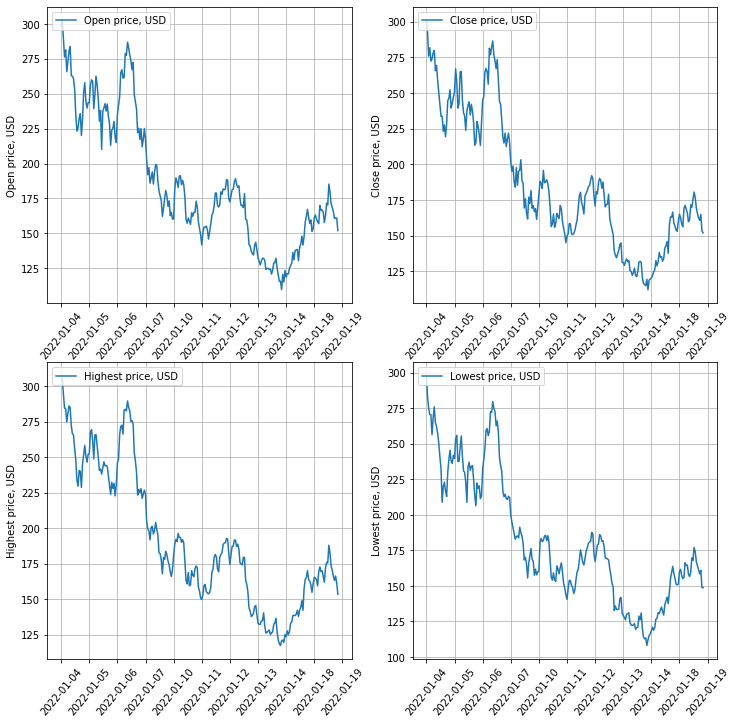

In [ ]:
# Still task 6
from matplotlib.pyplot import figure
from matplotlib import ticker
tck = ticker.MaxNLocator(12)
fig1, axs1 = plt.subplots(2, 2, figsize=(12, 12), sharex=False)
axs1[0, 0].plot(ydf.Date, ydf.Open, label='Open price, USD')
axs1[0, 0].grid(color='0.7')
axs1[0, 0].legend(loc='upper left')
axs1[0, 0].set_xticklabels(ydf.Date, rotation=50)
axs1[0, 0].xaxis.set_major_locator(tck)
axs1[0, 0].set_ylabel('Open price, USD')

axs1[0, 1].plot(ydf.Date, ydf.Close, label='Close price, USD')
axs1[0, 1].grid(color='0.7')
axs1[0, 1].legend(loc='upper left')
axs1[0, 1].set_xticklabels(ydf.Date, rotation=50)
axs1[0, 1].xaxis.set_major_locator(tck)
axs1[0, 1].set_ylabel('Close price, USD')

axs1[1, 0].plot(ydf.Date, ydf.High, label='Highest price, USD')
axs1[1, 0].grid(color='0.7')
axs1[1, 0].legend(loc='upper left')
axs1[1, 0].set_xticklabels(ydf.Date, rotation=50)
axs1[1, 0].xaxis.set_major_locator(tck)
axs1[1, 0].set_ylabel('Highest price, USD')

axs1[1, 1].plot(ydf.Date, ydf.Low, label='Lowest price, USD')
axs1[1, 1].grid(color='0.7')
axs1[1, 1].legend(loc='upper left')
axs1[1, 1].set_xticklabels(ydf.Date, rotation=50)
axs1[1, 1].xaxis.set_major_locator(tck)
axs1[1, 1].set_ylabel('Lowest price, USD')

In [ ]:
# Task 7
ydf = ydf.set_index(ydf.Date)
ydf = ydf[['Open', 'High', 'Low','Close']]
ydf.head()

ydf['Open-Close']= ydf.Open - ydf.Close
ydf['High-Low']  = ydf.High - ydf.Low
ydf = ydf.dropna()
Xfin = ydf[['Open-Close', 'High-Low']]
print(Xfin.head())
Y = np.where(ydf['Close'].shift(-1)>ydf['Close'], 1, -1)
split_percentage = 0.7
split = int(split_percentage*len(ydf))

X_train = Xfin[:split]
Y_train = Y[:split]

X_test = Xfin[split:]
Y_test = Y[split:]
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train, Y_train)

accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

            Open-Close   High-Low
Date                             
2022-01-03   -3.059997   9.259979
2022-01-04    9.869995  21.190003
2022-01-05   13.449981  18.830017
2022-01-06   -5.380005  13.730011
2022-01-07    8.940003  13.649994
Train_data Accuracy: 0.62
Test_data Accuracy: 0.52


<ipython-input-69-3ca8e3a01f16>:16: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=12)


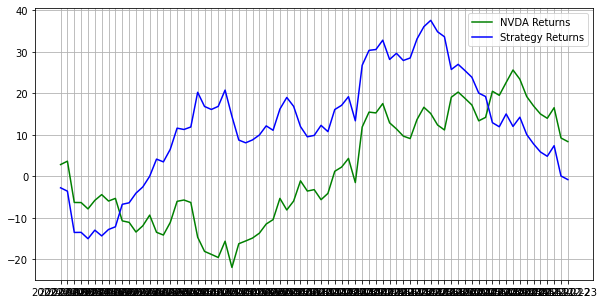

In [ ]:
# Still Task 7
ydf['Predicted_Point'] = knn.predict(Xfin)

# NVDA Cumulative Returns
ydf['NVDA_returns'] = np.log(ydf['Close'] / ydf['Close'].shift(1))
Cumulative_NVDA_returns = ydf[split:]['NVDA_returns'].cumsum()*100

# Cumulative Strategy Returns 
ydf['Startegy_returns'] = ydf['NVDA_returns'] * ydf['Predicted_Point'].shift(1)
Cumulative_Strategy_returns = ydf[split:]['Startegy_returns'].cumsum()*100

plt.figure(figsize=(10,5))
plt.plot(Cumulative_NVDA_returns, color='g', label='NVDA Returns')
plt.plot(Cumulative_Strategy_returns, color='blue', label='Strategy Returns')
plt.grid()
plt.locator_params(axis='x', nbins=12)
plt.legend()
plt.show()

In [ ]:
# Finalizing Task 7
Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns-Cumulative_NVDA_returns)/Std
Sharpe = Sharpe.mean()
print('Sharpe ratio: %.2f'%Sharpe)

# Cumulative strategy choice is reasonable due to high sharpe ratio and overall better-than-market performance
# depicted on the plot. Moreover, it was presented in the article so it was better understandable to code.

Sharpe ratio: 0.80


## Decision Trees Analysis
**Hint**. Use [this material](https://blog.quantinsti.com/decision-tree/) to start your own calculations.

**Useful link**: [decision trees and random forests](https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/05.08-Random-Forests.ipynb).

---
**Task 8**. Upload data for one ticker (for the recent year) from Quandl. Make brief exploratory analysis of obtained data.

**Task 9**. Apply Decision Tree to obtained data. Assess the quality of the model. Create and briefly justify the trading strategy.

In [ ]:
!pip install quandl

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!ls
!tar xvzf ta-lib-0.4.0-src.tar.gz
!ls
import os
os.chdir('ta-lib')
!./configure --prefix=/usr
!make
!make install
os.chdir('../')
!ls
!pip install TA-Lib
import talib

In [ ]:
# Task 8 starts here
import quandl
quandl.ApiConfig.api_key = 'wsdUdX1wVfbxEpNCrxQP'

findf = quandl.get_table("WIKI/PRICES", ticker = 'AAPL')
print(findf.head())
print(findf.tail())
print(findf.shape)
print(findf.info())
# EDA rolls in
print('Highest close price: ', findf.close.max())
print('Lowest close price: ', findf.close.min())
print('Total deals with AAPL stock, USD: ', findf.volume.sum())
print('Highest price per stock accepted: ', findf.high.max())
print('Lowest price per stock accepted: ', findf.low.min())
print('Average open price: ', findf.open.mean())
print('Average close price: ', findf.close.mean())
print('Greatest price difference within trading session: ', (findf.close - findf.open).max())

     ticker       date    open    high     low    close      volume  \
None                                                                  
0      AAPL 2018-03-27  173.68  175.15  166.92  168.340  38962839.0   
1      AAPL 2018-03-26  168.07  173.10  166.44  172.770  36272617.0   
2      AAPL 2018-03-23  168.39  169.92  164.94  164.940  40248954.0   
3      AAPL 2018-03-22  170.00  172.68  168.60  168.845  41051076.0   
4      AAPL 2018-03-21  175.04  175.09  171.26  171.270  35247358.0   

      ex-dividend  split_ratio  adj_open  adj_high  adj_low  adj_close  \
None                                                                     
0             0.0          1.0    173.68    175.15   166.92    168.340   
1             0.0          1.0    168.07    173.10   166.44    172.770   
2             0.0          1.0    168.39    169.92   164.94    164.940   
3             0.0          1.0    170.00    172.68   168.60    168.845   
4             0.0          1.0    175.04    175.09   171.2

In [ ]:
import talib as ta
findf['EMA10'] = ta.EMA(findf['close'].values, timeperiod=10)
findf['EMA30'] = ta.EMA(findf['close'].values, timeperiod=30)
findf['ATR'] = ta.ATR(findf['high'].values, findf['low'].values, findf['close'].values, timeperiod=14)
findf['ADX'] = ta.ADX(findf['high'].values, findf['low'].values, findf['close'].values, timeperiod=14)
findf['RSI'] = ta.RSI(findf['close'].values, timeperiod=14)
macd, macdsignal, macdhist = ta.MACD(findf['close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
findf['MACD'] = macd
findf['MACDsignal'] = macdsignal
print(findf.tail())
findf.head()

     ticker       date   open   high    low  close     volume  ex-dividend  \
None                                                                         
9395   AAPL 1980-12-18  26.63  26.75  26.63  26.63   327900.0          0.0   
9396   AAPL 1980-12-17  25.87  26.00  25.87  25.87   385900.0          0.0   
9397   AAPL 1980-12-16  25.37  25.37  25.25  25.25   472000.0          0.0   
9398   AAPL 1980-12-15  27.38  27.38  27.25  27.25   785200.0          0.0   
9399   AAPL 1980-12-12  28.75  28.87  28.75  28.75  2093900.0          0.0   

      split_ratio  adj_open  ...   adj_low  adj_close   adj_volume      EMA10  \
None                         ...                                                
9395          1.0  0.391536  ...  0.391536   0.391536   18362400.0  30.814946   
9396          1.0  0.380362  ...  0.380362   0.380362   21610400.0  29.915865   
9397          1.0  0.373010  ...  0.371246   0.371246   26432000.0  29.067526   
9398          1.0  0.402563  ...  0.400652   0.4

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,...,adj_low,adj_close,adj_volume,EMA10,EMA30,ATR,ADX,RSI,MACD,MACDsignal
None,,,,,,,,,,,,,,,,,,,,,
0,AAPL,2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,...,166.92,168.340,38962839.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAPL,2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,...,166.44,172.770,36272617.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAPL,2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,...,164.94,164.940,40248954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAPL,2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,...,168.60,168.845,41051076.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAPL,2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,...,171.26,171.270,35247358.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
findf['Return'] = findf['close'].pct_change(1).shift(-1)
findf['target_cls'] = np.where(findf.Return > 0, 1, 0)
findf['target_rgs'] = findf['Return']
predictors_list = ['ATR', 'ADX','RSI', 'EMA10', 'EMA30', 'MACD', 'MACDsignal']
Xaapl = findf[predictors_list]
y_cls = findf.target_cls
y_rgs = findf.target_rgs
yaapl = y_cls
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(Xaapl, yaapl, test_size=0.3, random_state=432, stratify=yaapl)
print(X_cls_train.shape, y_cls_train.shape)
print(X_cls_test.shape, y_cls_test.shape)
train_length = int(len(findf)*0.70)
X_rgs_train = Xaapl[:train_length]
X_rgs_test = Xaapl[train_length:]
y_rgs_train = y_rgs[:train_length]
y_rgs_test = y_rgs[train_length:]
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=6)
clf = clf.fit(X_cls_train, y_cls_train)
y_cls_pred = clf.predict(X_cls_test)
from sklearn.metrics import classification_report
report = classification_report(y_cls_test, y_cls_pred)
print(report)

## Face Detection
**Hint**. Use [this material](https://towardsdatascience.com/simple-face-detection-in-python-1fcda0ea648e) to start your own calculations.

**Useful link**: [mainfold learning](https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/05.10-Manifold-Learning.ipynb).

---

**Task 10**. Provide the face detection for your photo with rectangular border around your face (use material and examples above).

*In accordance with GSOM bylaws, your photo (image) will be only processed and stored in purposes of this HomeWork assessment and will not be distributed to third-parties.*

In [ ]:
# Task 10 starts here
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
face_cascade = cv2.CascadeClassifier('face_detector.xml')
img = cv2.imread('face_train.jpg')
faces = face_cascade.detectMultiScale(img, 1.1, 4)
for (x, y, w, h) in faces: 
  cv2.rectangle(img, (x, y), (x+w, y+h), (255, 196, 0), 3)
cv2.imwrite('face_detected.png', img) 
print('Successfully saved, go check that border around your face (prolly)')
# I checked some images both in colab and on my local machine
# Everything works fine, the default border thickness of 2 is a bit too thin imo
# I even found and image that wasn't recognized, guess it's due to me wearing a headset
# with a microphone near my mouth.
# Those open-sourcers who wrote that xml are literal heroes. I wonder how it works being a
# mark-up language, though

Successfully saved, go check that border around your face (prolly)
